# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import math

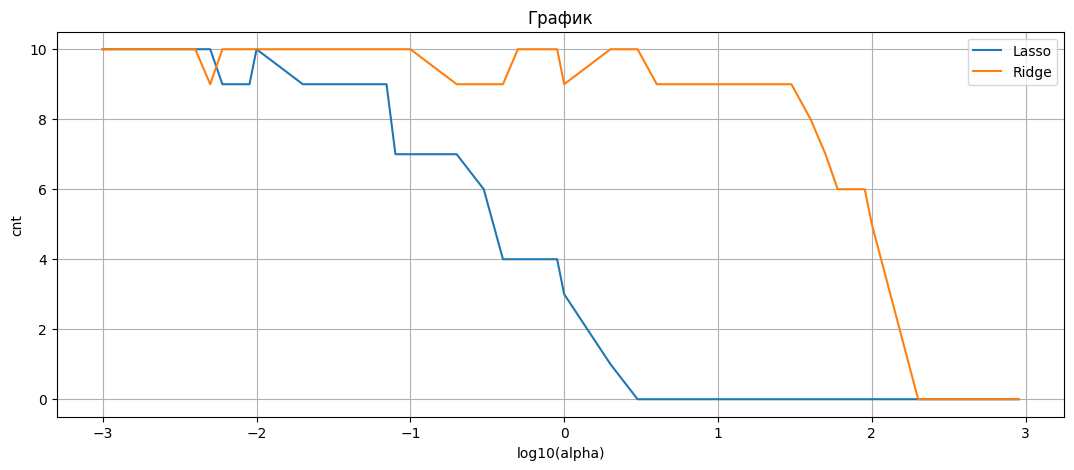

In [6]:

cf = []

ans_lasso = []

ans_ridge = []

for i in range(-3, 3):
  for j in range(1, 10):
    a = j * (10 ** i)
    cf.append(a)

def f1(a):
  clf = linear_model.Lasso(alpha=a)
  clf.fit(X_train, y_train)
  clf.predict(X_test)
  cnt = 0
  for i in clf.coef_:
    if abs(i) >= 5:
      cnt += 1

  return cnt

def f2(a):
  clf = linear_model.Ridge(alpha=a)
  clf.fit(X_train, y_train)
  clf.predict(X_test)
  cnt = 0
  for i in clf.coef_:
    if abs(i) >= 5:
      cnt += 1

  return cnt

for c in cf:
  a1 = f1(c)
  a2 = f2(c)
  ans_lasso.append(a1)
  ans_ridge.append(a2)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot([math.log(i, 10) for i in cf], ans_lasso, label='Lasso')
ax.plot([math.log(i, 10) for i in cf], ans_ridge, label='Ridge')
ax.set_title(u"График")
ax.set_xlabel(u"log10(alpha)")
ax.set_ylabel(u"cnt")
ax.grid()
ax.legend()


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
clf = linear_model.Ridge()
clf.fit(X_train, y_train)
predick = clf.predict(X_test)

print(mean_squared_error(y_test, predick) ** 0.5)

print(mean_absolute_error(y_test, predick))

print(r2_score(y_test, predick))





58.30429511391227
49.602750809651916
0.3599020220009461


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

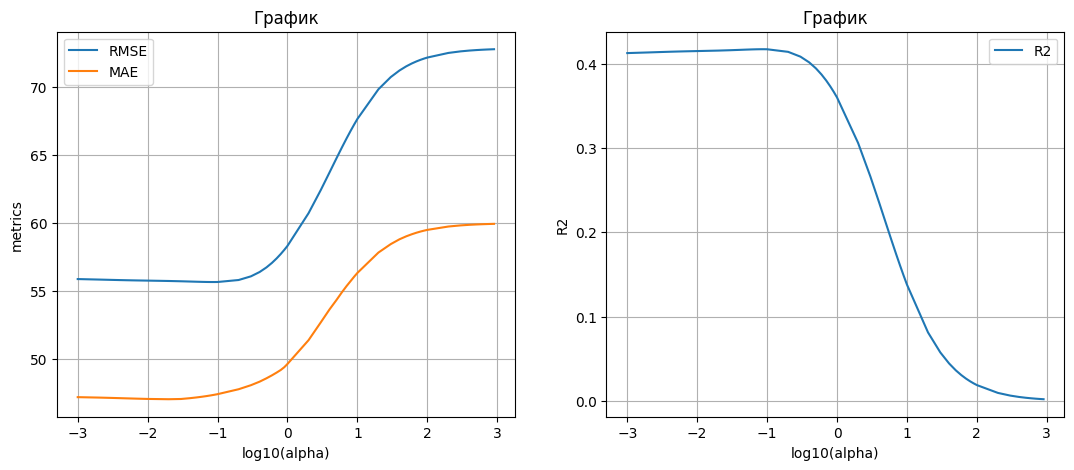

In [18]:
rmse = []

mae = []

r2 = []

for c in cf:
  clf = linear_model.Ridge(c)
  clf.fit(X_train, y_train)
  predick = clf.predict(X_test)
  rmse.append(mean_squared_error(y_test, predick) ** 0.5)
  mae.append(mean_absolute_error(y_test, predick))
  r2.append(r2_score(y_test, predick))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot([math.log(i, 10) for i in cf], rmse, label='RMSE')
ax1.plot([math.log(i, 10) for i in cf], mae, label='MAE')
ax1.set_title(u"График")
ax1.set_xlabel(u"log10(alpha)")
ax1.set_ylabel(u"metrics")
ax1.grid()
ax1.legend()

ax2.plot([math.log(i, 10) for i in cf], r2, label='R2')
ax2.set_title(u"График")
ax2.set_xlabel(u"log10(alpha)")
ax2.set_ylabel(u"R2")
ax2.grid()
ax2.legend()

In [19]:
clf = linear_model.Ridge(0.1)
clf.fit(X_train, y_train)
predick = clf.predict(X_test)
print(mean_squared_error(y_test, predick) ** 0.5)
print(mean_absolute_error(y_test, predick))
print(r2_score(y_test, predick))



55.64176122404913
47.375463757061304
0.41702880920983465


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([199.,  43.,  27.,  19.,  10.,   5.,   2.,   2.,   1.,   1.]),
 array([8.85150216e-02, 2.42702189e+03, 4.85395526e+03, 7.28088863e+03,
        9.70782200e+03, 1.21347554e+04, 1.45616887e+04, 1.69886221e+04,
        1.94155555e+04, 2.18424889e+04, 2.42694222e+04]),
 <BarContainer object of 10 artists>)

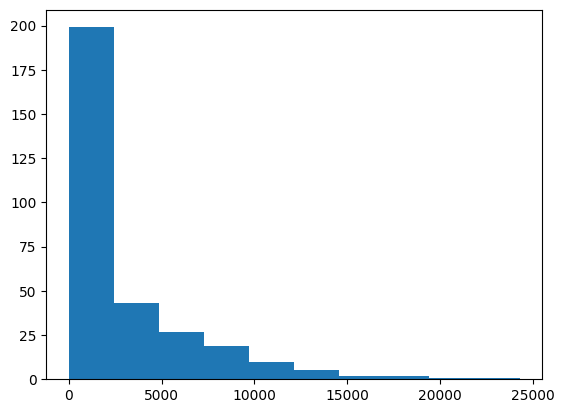

In [22]:
clf = linear_model.Ridge(0.1)
clf.fit(X_train, y_train)
predick = clf.predict(X_train)

errors = []
for i in range(len(predick)):
  errors.append(mean_squared_error([y_train[i]], [predick[i]]))

plt.hist(errors)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [23]:
clf = linear_model.Ridge(alpha=0.1)
clf.fit(X_train, y_train)
predick_train = clf.predict(X_train)

error_threshold = 5000
indexes = ((y_train - predick_train) ** 2) <= error_threshold
new_x_train, new_y_train = X_train[indexes], y_train[indexes]

clf = linear_model.Ridge(alpha=0.1)
clf.fit(new_x_train, new_y_train)
predick = clf.predict(X_test)

print(mean_squared_error(y_test, predick) ** 0.5)
print(mean_absolute_error(y_test, predick))
print(r2_score(y_test, predick))

55.49074963948076
47.07641566854014
0.42018887953922635


__Задание 3.__ Отчёт

**(2 балла)**

*По гистограме увидел большие ошибки, ну и логично выкинул. Как можно видеть, после удаления объектов выбросов ответы стали лучше.
Дз делал с помощью Антона Ныйкина и с Артемом Багринцевым.
Всегда бы такую домашку*
